# Spam E-Mail Sƒ±nƒ±flandƒ±rma Projesi

## Hazƒ±r Veri Setini Okumak
Hazƒ±r veri seti olarak, Kaggle sitesinde bulunan "Ling-Spam Dataset" veri setini kullandƒ±m.

In [1]:
import pandas as pd 

# Hazƒ±r veri setini bir pandas dataFrame yapƒ±sƒ±na aktarƒ±yorum
df=pd.read_csv('C:/Users/Talha/Desktop/spam_filter/veri_seti/messages.csv')
df.head()  # Okumayƒ± kontrol etmek ve veri setimizi incelemek adƒ±na ilk 5 veriye bakalƒ±m


subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

Veri setinde 3 nitelik bulunuyor. Subject(Mail Ba≈ülƒ±ƒüƒ±), Message(Mail ƒ∞√ßeriƒüi), Label(Etiket => 0=Spam Deƒüil,1=Spam Mail) 

### Ana veriyi bozmamak i√ßin kopya veri yapƒ±sƒ± olu≈üturma

In [2]:
df_t = df.copy()  # Bu kopya √ºzerinde i≈ülemler y√ºr√ºt√ºlecek
df_t.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

## Tutarsƒ±zlƒ±ƒüƒ± √∂nleme

- B√ºy√ºk harf/k√º√ß√ºk harf kullanƒ±mlarƒ±ndan kaynaklanan veri tutarsƒ±zlƒ±klarƒ±nƒ± gidermek i√ßin b√ºt√ºn karakterleri k√º√ß√ºk harfe d√∂n√º≈üt√ºrd√ºm.

In [3]:
df_t['message'] = df_t['message'].str.lower() 
#√ñrneƒüin, "Hello" ve "hello" mesajlarƒ±,  b√ºy√ºk harf/k√º√ß√ºk harf farklƒ±lƒ±ƒüƒ± nedeniyle iki farklƒ± kelime gibi i≈ülem g√∂rebilir. 
#Bu sayede hem tutarsƒ±zlƒ±k √∂nlenir hem de performans artar.

## Eksik Verilerin Giderilmesi

In [4]:
df.isnull().sum() #Eksik verilerin toplamƒ± incelenir

subject    62
message     0
label       0
dtype: int64

Toplamda **62** tane eksik veril olduƒüu g√∂r√ºl√ºr. Eksik veriler sadece *subject* niteliƒüinde bulunuyor.

### Eksik veriler, **en sƒ±k** tekrar eden veri ile g√ºncellenir.

En sƒ±k tekrar eden veri, eksik deƒüerleri doldurmak i√ßin kullanƒ±lan pop√ºler bir y√∂ntemdir.
Bu y√∂ntem, bir veri k√ºmesindeki eksik deƒüerlerin **olasƒ± en k√º√ß√ºk deƒüi≈üikliƒüi i√ßermesini saƒülar** ve verilerin daƒüƒ±lƒ±mƒ±nƒ± bozmaz.

Veri eksikliƒüi sadece *subject* niteliƒüi altƒ±nda olduƒüu i√ßin sadece **subject niteliƒüine √∂zg√º** g√ºncelleme yapƒ±lƒ±r.

In [5]:
df_t.fillna(df_t['subject'].mode().values[0],inplace=True)
 # NaN deƒüerleri, df_t veri setinin mail ba≈ülƒ±ƒüƒ± kƒ±smƒ±ndaki (mod)en sƒ±k tekrar eden "mode[0]" deƒüeri ile deƒüi≈ütir.
df_t.isnull().sum() # Eksik verilerin kontrol√º

subject    0
message    0
label      0
dtype: int64

# Yeni √ñzellik Yaratma / √ñzellik M√ºhendisliƒüi 

 - "*subject*" niteliƒüi  e-posta konusunu a√ßƒ±klar, "*message*" niteliƒüi ise e-posta i√ßeriƒüini tanƒ±mlar. Bu iki **nitelik/√∂zellik** birle≈ütirilerek "*sub_mssg*" √∂zelliƒüi olu≈üturulur, veriler daha anlamlƒ± ve i≈ülevsel hale getirilmi≈ü olur. Bu yeni nitelik i√ßinde  daha verimli ≈üekilde anahtar kelimeler bulunabilir veya etiketleri/temalarƒ± belirlenebilir.

In [6]:
df_t['sub_mssg']=df_t['subject']+df_t['message']
df_t.head()

subject  \
0            job posting - apple-iss research center   
1                                   sociolinguistics   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   

                                            sub_mssg  
0  job posting - apple-iss research centercontent...  
1  sociolinguisticslang classification grimes , j...  
2  query : letter frequencies for text identifica...  
3  riska colleague and i are researching the diff...  
4  request book informationearlier this morning i...

- **Mesajlarƒ±n uzunluk bilgisi**, *spam / ham ayrƒ±mƒ±* yapmak i√ßin bir parametre olarak kullanƒ±labilir. Bu y√ºzden yeni bir √∂zellik olarak length niteliƒüini ekliyorum.

In [7]:
df_t['length']=df_t['sub_mssg'].apply(len)
df_t.head()

subject  \
0            job posting - apple-iss research center   
1                                   sociolinguistics   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   

                                            sub_mssg  length  
0  job posting - apple-iss research centercontent...    2895  
1  sociolinguisticslang classification grimes , j...    1816  
2  query : letter frequencies for text identifica...    1485  
3  riska colleague and i are researching the diff...     328  
4  request book informationearlier this morning i...    1070

# Veri G√∂rselle≈ütirme

- Hazƒ±r veri setindeki label √∂zelliƒüi spam ve spam olmayan  mailleri 1/0 olarak etiketliyor. Elimizde ne kadar spam ve spam olmayan verinin olduƒüunu daha iyi anlamak i√ßin veri g√∂rselle≈ütirme yaptƒ±m.

 Sayƒ±lar : [Spam Deƒüil, Spam Mail] = [2412, 481]


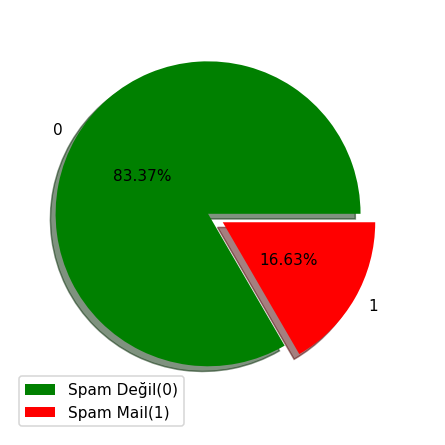

In [8]:
import matplotlib.pyplot as plt 

#  " .index " E≈üsiz kayƒ±tlarƒ± d√∂nd√ºr√ºr. 0 ve 1 den ba≈üka veri olup olmadƒ±ƒüƒ±nƒ± da kontorl etmi≈ü oluruz.
etiketler = df_t['label'].value_counts().index.tolist()
# " .values " E≈üsiz kayƒ±tlarƒ±n sayƒ±sƒ±nƒ± hesaplar ve .tolist bu sayƒ±larƒ±n listesini olu≈üturur.
miktarlar = df_t['label'].value_counts().values.tolist()
print(f" Sayƒ±lar : [Spam Deƒüil, Spam Mail] = {miktarlar}")

aciklik=(0.10,0)
renkler=('green','red')
plt.figure(figsize=(10,5),dpi=110)
plt.pie(x=miktarlar,explode=aciklik,labels=etiketler,colors=renkler,autopct='%.2f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["Spam Deƒüil(0)",'Spam Mail(1)'])
plt.show()

# Veri √ñn ƒ∞≈üleme

Veri √∂n i≈üleme adƒ±mƒ±nda ama√ß,  verileri i≈ülenebilir hale getirmektir. Bu i≈ülemler neticesinde makine √∂ƒürenimi modelleri ile verilerimizin analizinin yapƒ±lmasƒ± saƒülanacak.

- Verilerin i√ßeriƒüi:

In [9]:
df_t['message'][8] 

"content - length : 1937 greetings ! i ' m wondering if someone out there can identify the languages used in two recent ibm commercials . they have out a series of three ads with people in different countries talking about ibm equipment and services . one ad has two old gentlemen walking along what looks like the seine , speaking french . a second ad has two men sitting in what is apparently a middle eastern marketplace , and a third ad has nuns discussing ibm equipment on their way to mass . i assume the men are speaking arabic ( though i would be grateful to have that confirmed ) , but i have no idea what the nuns are speaking . anyone know ? i would also like to take this opportunity to thank all those who responded to my questions early last year about some french , italian and swedish expressions in some print ads . i meant to send individual thanks , but i lost the file in which i had the respondents ! please forgive me , and accept this general acknowledgment instead . if any of

## Metin Normalizasyonu

Metinlerin i≈ülenebilirliƒüini artƒ±rmak i√ßin ingilizcede bulunan √∂zel durumlarƒ±n mormalizasyonu saƒülanmalƒ±dƒ±r. Bunu yapmak i√ßin *regular expression* mod√ºl√º olan **re** k√ºt√ºphanesinden yaralanƒ±yorum.

In [10]:
# df_t.loc[df_t['message'].str.contains("aranan_ifade")].index    

df_t.loc[df_t['message'].str.contains("n\'t")].index

Int64Index([   2,    3,   15,   16,   21,   27,   35,   38,   68,   70,
            ...
            2863, 2867, 2869, 2870, 2871, 2882, 2885, 2886, 2890, 2891],
           dtype='int64', length=541)

In [11]:
import re

In [12]:
def normz(ifade):
    # ('t)(not) kƒ±saltmasƒ± i√ßin √∂ncelikli olarak incelemesi gereken ifadeler
    ifade = re.sub(r"won't", "will not", ifade)
    ifade = re.sub(r"can't", "can not", ifade)
    ifade = re.sub(r"won\'t", "will not", ifade)
    ifade = re.sub(r"can\'t", "can not", ifade)
    # varsayƒ±lan √∂zel durumlar
    ifade = re.sub(r"n\'t", " not", ifade)
    ifade = re.sub(r"\'re", " are", ifade)
    ifade= re.sub(r"\'s", " is", ifade)
    ifade = re.sub(r"\'d", " would", ifade)
    ifade = re.sub(r"\'ll", " will", ifade)
    ifade = re.sub(r"\'t", " not", ifade)
    ifade = re.sub(r"\'ve", " have", ifade)
    ifade = re.sub(r"\'m", " am", ifade)
    # bo≈üluk bƒ±rakƒ±lan durumlar
    ifade = re.sub(r"n\' t", " not", ifade)
    ifade = re.sub(r"\' re", " are", ifade)
    ifade = re.sub(r"\' s", " is", ifade)
    ifade = re.sub(r"\' d", " would", ifade)
    ifade = re.sub(r"\' ll", " will", ifade)
    ifade = re.sub(r"\' t", " not", ifade)
    ifade = re.sub(r"\' ve", " have", ifade)
    ifade = re.sub(r"\' m", " am", ifade)
    return ifade

**normz** fonksiyonunda, √∂zel durumlu kƒ±saltmalar i≈ülenebilirliƒüi daha y√ºksek kelimelere g√ºncellenerek geri d√∂nd√ºr√ºl√ºr. Bu foknsiyonun uygulanmasƒ± ile i≈ülenebilirlik artar, veri tutarsƒ±zlƒ±ƒüƒ± √∂nlenir ve performans artƒ±rƒ±lƒ±r.

In [13]:
df_t['sub_mssg'][3] 

"riska colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have n't come up with much . can anyone help here ?\n"

In [14]:
df_t['sub_mssg'] = df_t['sub_mssg'].apply(normz)
df_t['sub_mssg'][3] 

'riska colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have  not come up with much . can anyone help here ?\n'

## Metin Temizleme

 Metin temizleme, verilerdeki gereksiz karakterler, noktalama i≈üaretleri, sayƒ±lar, baƒüla√ßlar gibi unsurlarƒ±n temizlenmesidir.

In [15]:
df['message'][0] 

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

### Sayƒ±sal ƒ∞fadeleri Temizleme

In [16]:
df_t['sub_mssg'] = df_t['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers', regex=True)
df_t['sub_mssg'][0]

'job posting - apple-iss research centercontent - length : numbers apple-iss research center a us $ numbers million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statis

### Diƒüer Gereksiz ƒ∞fadeleri Temizleme

 Bu deƒüi≈üiklikler, metinlerin daha temiz bir hale getirilmesine ve analiz edilmesine yardƒ±mcƒ± olur.

In [17]:

df_t['sub_mssg']=df_t['sub_mssg'].str.lower() # K√º√ß√ºk harfe d√∂n√º≈üt√ºrme

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'\n'," ",regex=True) # satƒ±r ba≈üƒ± karakterlerini bo≈üluk karakteriyle deƒüi≈ütirir

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID',regex=True) #  xyz@xmail.com -> MailID

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links',regex=True) # abc.com -> Links

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'¬£|\$', 'Money',regex=True)  # Para birimi karakterleri -> Money

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'\s+', ' ',regex=True)  # Birden fazla bo≈üluk karakteri

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'^\s+|\s+?$', '',regex=True) # Ba≈üta ve sonda bulunan birden fazla bo≈üluk

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number',regex=True)#0850... -> contact number

df_t['sub_mssg']=df_t['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ",regex=True) #  Alfanumerik olmayan karakterler

In [18]:
df_t['sub_mssg'][1]

'sociolinguisticslang classification grimes joseph e and barbara f grimes ethnologue language family index pb isbn numbers numbers numbers numbers vi numbers pp Money numbers numbers summer institute of linguistics this companion volume to ethnologue languages of the world twelfth edition lists language families of the world with sub groups shown in a tree arrangement under the broadest classification of language family the language family index facilitates locating language names in the ethnologue making the data there more accessible internet academic books sil org languages reference lang culture gregerson marilyn ritual belief and kinship in sulawesi pb isbn numbers numbers numbers numbers ix numbers pp Money numbers numbers summer institute of linguistics seven articles discuss five language groups in sulawesi indonesia the primary focus is on cultural matters with some linguistic content topics include traditional religion and beliefs certain ceremonies and kinship internet acade

Bu ≈üekilde verilerimizin i≈ülenebilirliƒüi y√ºkseldi.

In [19]:
df_t.head()

subject  \
0            job posting - apple-iss research center   
1                                   sociolinguistics   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   

                                            sub_mssg  length  
0  job posting apple iss research centercontent l...    2895  
1  sociolinguisticslang classification grimes jos...    1816  
2  query letter frequencies for text identificati...    1485  
3  riska colleague and i are researching the diff...     328  
4  request book informationearlier this morning i...    1070

## Metin D√∂n√º≈üt√ºrme

ƒ∞lk olarak basit bir metin d√∂n√º≈üt√ºrme y√∂ntemi olan **Stopwords** y√∂ntemini uygulayacaƒüƒ±m. Stopwords, metindeki yaygƒ±n kelimeleri (√∂rneƒüin "the", "and", "in" gibi) √ßƒ±karmak i√ßin kullanƒ±lƒ±r ve makine √∂ƒürenimi modelleri tarafƒ±ndan kullanƒ±lmayan, anlamsƒ±z kelimeleri temizlemek i√ßin tasarlanmƒ±≈ütƒ±r.

In [20]:

import nltk
from nltk.corpus import stopwords 
# Stop words, dilbilgisi a√ßƒ±sƒ±ndan √∂nemli olmayan kelimelerdir ve bir metnin anlamƒ±nƒ± 
# belirleyen √∂nemli kelimeler deƒüildir.√ñrneƒüin, ƒ∞ngilizce stop words listesinde "the", "and", "a", "an", "in" vb.

# nltk.download('stopwords') # Stopwords dosyasƒ±nƒ±n indirilmesi, indirilip yorum satƒ±rƒ± haline getirildi

# stop words verilerini i√ßeren nesneyi olu≈üturma:
stop = stopwords.words('english')

# stopwords'larƒ± silme ve yeni √∂zellik olu≈üturma:
df_t['Cleaned_Text'] = df_t['sub_mssg'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [21]:
df_t.head()

subject  \
0            job posting - apple-iss research center   
1                                   sociolinguistics   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   

                                            sub_mssg  length  \
0  job posting apple iss research centercontent l...    2895   
1  sociolinguisticslang classification grimes jos...    1816   
2  query letter frequencies for text identificati...    1485   
3  riska colleague and i are researching the diff...     328   
4  request book informationearlier this morning i...    1070   

                                        Cleaned_Text  
0  job posting apple iss research centercontent l...  
1  sociolinguisticslang classification grimes jos...  
2  query letter frequencies text identificationi ...  
3  riska colleague researching differing degrees ...  
4  request book informationearlier morning phone ...

In [22]:
df_t['clean_length']=df_t['Cleaned_Text'].apply(len)
df_t.head()

subject  \
0            job posting - apple-iss research center   
1                                   sociolinguistics   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   

                                            sub_mssg  length  \
0  job posting apple iss research centercontent l...    2895   
1  sociolinguisticslang classification grimes jos...    1816   
2  query letter frequencies for text identificati...    1485   
3  riska colleague and i are researching the diff...     328   
4  request book informationearlier this morning i...    1070   

                                        Cleaned_Text  clean_length  
0  job posting apple iss research centercontent l...          2108  
1  sociolinguisticslang classification grimes jos...          1506  
2  query letter frequencies text identificationi ...          1148  
3  riska colleague researching differing degrees ...           214  
4  request book informationearlier morning phone ...           653

Elimde toplamda 3 tane uzunluk parametresi olu≈ütu. length, orijinal uzunluk. prep_length, gereksiz karakterlerin kaldƒ±rƒ±ldƒ±ƒüƒ± mesaj uzunluƒüu. clean_length, hem gereksiz karakterlerin hem de manasƒ±z kelimelerin kaldƒ±rƒ±ldƒ±ƒüƒ± mesaj uzunluƒüunu ifade ediyor.

Artƒ±k elimde, tamamen √∂n i≈üleme adƒ±mlarƒ±ndan ge√ßirilmi≈ü bir mesaj i√ßeriƒüi olduƒüu i√ßin diƒüer mesaj niteliklerini veri setinden √ßƒ±karƒ±yorum.

In [23]:
df_t.drop('subject',axis=1,inplace=True)
df_t.drop('message',axis=1,inplace=True)
df_t.drop('sub_mssg',axis=1,inplace=True)
df_t.rename(columns={'length': 'orj_length'}, inplace=True)
df_t.head()

label  orj_length                                       Cleaned_Text  \
0      0        2895  job posting apple iss research centercontent l...   
1      0        1816  sociolinguisticslang classification grimes jos...   
2      0        1485  query letter frequencies text identificationi ...   
3      0         328  riska colleague researching differing degrees ...   
4      0        1070  request book informationearlier morning phone ...   

   clean_length  
0          2108  
1          1506  
2          1148  
3           214  
4           653

In [24]:
df['message'][38] # orijinal i√ßerik ile arakadaki farkƒ± g√∂rmek i√ßin df_t['Cleaned_Text'][38] i√ßeriƒüini √ßaƒüƒ±ralƒ±m
#df_t['Cleaned_Text'][38]

'note : we do not wish to send e-mail to anyone that does not want it so please send an e-mail to : remove929 @ yahoo . com you will be removed promptly . * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * " the internet success toolbox " the most complete marketing software package available anywhere ! this is what you will receive on cd-rom : 1 . stealth mass mailer ( $ 399 . 00 value ) - this unique , first of it \'s kind - software that allows you to easily send 250 , 000 e-mail messages an hour . simply enough by making a single connection to the internet using a standard modem , and connecting to either 20 different mail servers , or a single mail server 20 times . this , easy to use , software is designed for the basic computer user to understand . it \'s as easy as imputing the mail server , selecting the list of e-mail recipients to send to , inserting your e-mail address , adding your subject line 

Orijinal uzunluk ve temizlenmi≈ü i√ßeriƒüin uzunluƒüu arasƒ±ndaki fark bize manasƒ±z ifadelerin sayƒ±sƒ±nƒ± verecektir. Spam mail i√ßeriklerinde bulunan (!, $, 1-9, *, -) vb. ifadelerin sƒ±klƒ±ƒüƒ±nƒ±n fazla olmasƒ±, spam mail tespitinde yararlƒ± bir parametre olarak kullanƒ±labilir. Bu y√ºzden orj_length ve clean_length 'in farklarƒ±nƒ±n alƒ±ndƒ±ƒüƒ± yeni bir √∂zellik olu≈üturacaƒüƒ±m.

In [25]:
df_t['diff_length'] = df_t['orj_length'] - df_t['clean_length']
df_t.head()

label  orj_length                                       Cleaned_Text  \
0      0        2895  job posting apple iss research centercontent l...   
1      0        1816  sociolinguisticslang classification grimes jos...   
2      0        1485  query letter frequencies text identificationi ...   
3      0         328  riska colleague researching differing degrees ...   
4      0        1070  request book informationearlier morning phone ...   

   clean_length  diff_length  
0          2108          787  
1          1506          310  
2          1148          337  
3           214          114  
4           653          417

Artƒ±k diƒüer uzunluk verilerine ihtiyacƒ±m olmadƒ±ƒüƒ± i√ßin onlarƒ± veri setinden √ßƒ±karƒ±yorum.

In [26]:
df_t.drop('orj_length',axis=1,inplace=True)
df_t.drop('clean_length',axis=1,inplace=True)
df_t.head(3)

label                                       Cleaned_Text  diff_length
0      0  job posting apple iss research centercontent l...          787
1      0  sociolinguisticslang classification grimes jos...          310
2      0  query letter frequencies text identificationi ...          337

### diff_length √ñzelliƒüinin ƒ∞≈ülenebilirliƒüi

ƒ∞≈ülenebilirliƒüi anlamak i√ßin doƒürudan label √∂zelliƒüi ile arasƒ±ndaki ili≈ükiyi g√∂stren bir grafik olu≈üturdum.

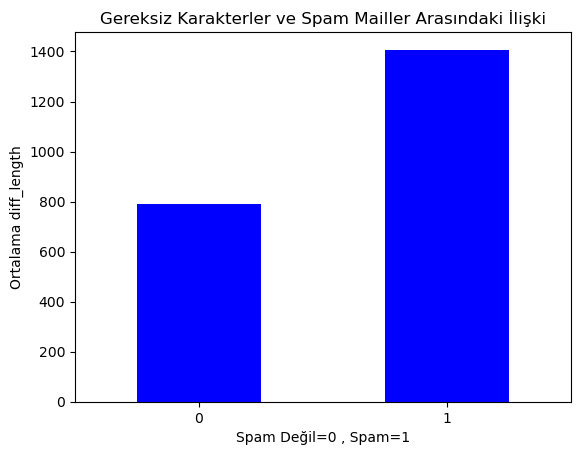

label
0     792.102819
1    1407.056133
Name: diff_length, dtype: float64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt



# 'label' s√ºtununa g√∂re gruplama ve 'diff_length' ortalamasƒ±nƒ± alma
grouped = df_t.groupby('label')['diff_length'].mean()

# Grafik olu≈üturma
grouped.plot(kind='bar', color='blue')
plt.xlabel('Spam Deƒüil=0 , Spam=1')
plt.ylabel('Ortalama diff_length')
plt.title('Gereksiz Karakterler ve Spam Mailler Arasƒ±ndaki ƒ∞li≈üki')
plt.xticks(rotation=0)
plt.show()
print(grouped)

G√∂r√ºleceƒüi √ºzere spam olan maillerin ortalama gereksiz karakter sayƒ±sƒ±nƒ±n deƒüeri 1400'ken spam olmayan maillerin ortalama gereksiz karakter sayƒ±sƒ± 800. Bu durumda spam mailler ile diff_length √∂zelliƒüi arasƒ±nda doƒürudan bir ili≈üki bulunduƒüunu s√∂yeleyebiliriz. Lakin sƒ±nƒ±flandƒ±rmayƒ± hazƒ±r fonksiyonlar aracƒ±lƒ±ƒüƒ± ile uygulayacaƒüƒ±m bu istatistiƒüi parametre olarak ekleyemedim.

## Metin Vekt√∂rle≈ütirme

Metin vekt√∂rle≈ütirme i≈ülemi, metin verilerini sayƒ±sal vekt√∂rlere d√∂n√º≈üt√ºrmeyi saƒülar. Bu d√∂n√º≈ü√ºm, metinlerin makine √∂ƒürenimi algoritmalarƒ± tarafƒ±ndan i≈ülenebilmesini saƒülar. Ben TF-IDF y√∂ntemini kullanacaƒüƒ±m.

TF-IDF, bir belgedeki bir kelimenin √∂nemini belirlemek i√ßin kullanƒ±lƒ±r. Bir kelimenin belgedeki sƒ±klƒ±ƒüƒ± (Term Frequency - TF) ile belgedeki diƒüer belgelerde nadir g√∂r√ºlme sƒ±klƒ±ƒüƒ± (Inverse Document Frequency - IDF) arasƒ±ndaki dengenin saƒülanmasƒ±yla kelimenin √∂nemi belirlenir. B√∂ylece, belirli bir belge i√ßinde sƒ±k g√∂r√ºlen ancak diƒüer belgelerde nadir olan kelimeler daha y√ºksek aƒüƒ±rlƒ±kla temsil edilir.

√ñrneƒüin, bir belgede "apple" kelimesi 5 kez ge√ßiyorsa, "apple" kelimesinin bu belgedeki terim sƒ±klƒ±ƒüƒ± (TF deƒüeri) 5 olacaktƒ±r.

√ñrneƒüin, "apple" kelimesi 100 belgede ge√ßiyorsa ve toplamda 1000 belge varsa, "apple" kelimesinin ters belge frekansƒ± (IDF deƒüeri) log(1000/100) = 1 olarak hesaplanƒ±r.

Bir terimin TF-IDF deƒüeri, TF deƒüeriyle IDF deƒüerinin √ßarpƒ±mƒ±dƒ±r.
√ñrneƒüin, "apple" kelimesi belgede 5 kez ge√ßiyorsa ve IDF deƒüeri 1 ise, "apple" kelimesinin TF-IDF deƒüeri 5 * 1 = 5 olur.

Bu deƒüerler sayesinde, metinlerdeki kelimenin √∂nemini yansƒ±tan vekt√∂r temsilleri elde edilir. 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer() # TfidfVectorizer sƒ±nƒ±fƒ±ndan bir √∂rnek

## Test ve Eƒüitim Veri Setlerinin Hazƒ±rlanmasƒ±

In [29]:
X = df_t['Cleaned_Text'] # Baƒüƒ±msƒ±z Deƒüi≈üken # 2.893 Kayƒ±t
Y = df_t['label'] # Baƒüƒ±mlƒ± Deƒüi≈üken

from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.24, random_state=225, stratify=Y)


#  Metinleri eƒüitim ve test veri k√ºmelerine b√∂lmek i√ßin train_test_split fonksiyonunu kullanƒ±yoruz. 
#  X ve Y verilerini belirtilen oranda b√∂lerken, 
#  rastgele bir durum (random_state) belirliyoruz. 
#  Ayrƒ±ca, sƒ±nƒ±flarƒ±n dengeli bir ≈üekilde b√∂l√ºnmesi i√ßin stratify parametresinin deƒüerini Y olarak atƒ±yoruz.

In [30]:
ham_count_train = (Y_train == 0).sum()
spam_count_train = (Y_train == 1).sum()

print("Eƒüitim Veri Seti:")
print("Ham Sayƒ±sƒ±:", ham_count_train)
print("Spam Sayƒ±sƒ±:", spam_count_train)
#2.198

Eƒüitim Veri Seti:
Ham Sayƒ±sƒ±: 1833
Spam Sayƒ±sƒ±: 365


In [31]:
ham_count_test = (Y_test == 0).sum()
spam_count_test = (Y_test == 1).sum()

print("Test Veri Seti:")
print("Ham Sayƒ±sƒ±:", ham_count_test)
print("Spam Sayƒ±sƒ±:", spam_count_test)
#695

Test Veri Seti:
Ham Sayƒ±sƒ±: 579
Spam Sayƒ±sƒ±: 116


## KNNeighbors Sƒ±nƒ±flandƒ±rmasƒ±

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
# KNN modelini olu≈üturma
knc = KNeighborsClassifier()
# Modeli eƒüitme
model_knn = Pipeline([('vectorizer',tvec),('classifier',knc)])
model_knn.fit(X_train,Y_train)

# Test verileri √ºzerinde tahmin yapma
y_pred_knn = model_knn.predict(X_test)
# Confusion matrix olu≈üturma ve raporlama
cm_knn = confusion_matrix(y_pred_knn,Y_test)
print(cm_knn)
print("Accuracy : ", accuracy_score(y_pred_knn,Y_test))
#695

[[560   7]
 [ 19 109]]
Accuracy :  0.962589928057554


C:\Users\Talha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## SVM Sƒ±nƒ±flandƒ±rmasƒ±

In [52]:
from sklearn.svm import SVC
# SVM modelini olu≈üturma
svm = SVC()
model_svm = Pipeline([('vectorizer', tvec), ('classifier', svm)])

# Modeli eƒüitme
model_svm.fit(X_train, Y_train)

# Test verileri √ºzerinde tahmin yapma
y_pred_svm = model_svm.predict(X_test)

# Confusion matrix olu≈üturma ve g√∂rselle≈ütirme
cm_svm = confusion_matrix(y_pred_svm,Y_test)
print(cm_svm)
print("Accuracy : ", accuracy_score(y_pred_svm,Y_test))

[[578  11]
 [  1 105]]
Accuracy :  0.9827338129496402


**Accuracy (Doƒüruluk) = (TP + TN) / (TP + TN + FP + FN)**: Accuracy, modelin doƒüru sƒ±nƒ±flandƒ±rƒ±lan √∂rneklerinin oranƒ±nƒ± temsil eder. Yani, doƒüru tahmin edilen √∂rneklerin toplam √∂rnek sayƒ±sƒ±na oranƒ±nƒ± g√∂sterir. Bu metrik, sƒ±nƒ±flandƒ±rma modelinin genel performansƒ±nƒ± deƒüerlendirmek i√ßin kullanƒ±lƒ±r.


## Confusion Matrix Deƒüerlerinin G√∂rselle≈ütirilmesi Ve ƒ∞ncelenmesi

### KNN Sƒ±nƒ±flandƒ±rmasƒ± ƒ∞√ßin Confusion Matrix

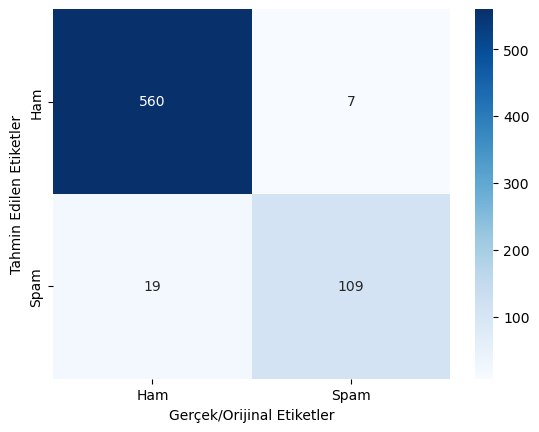

In [34]:
import seaborn as sns
class_names = ['Ham', 'Spam']
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Tahmin Edilen Etiketler")
plt.xlabel("Ger√ßek/Orijinal Etiketler")
plt.show()
#695

- **TP (true positive)**: Spam olarak doƒüru tahmin edilen sayƒ± (109)
- **FP (false positive)**: Spam olduƒüu halde yanlƒ±≈ü(ham) tahmin edilen sayƒ± (7)
- **TN (true negative)**: Ham olarak doƒüru tahmin edilen sayƒ± (560)
- **FN (false negative)**: Ham olduƒüu halde yanlƒ±≈ü(spam) edilen sayƒ± (19)

### SVM Sƒ±nƒ±flandƒ±rmasƒ± ƒ∞√ßin Confusion Matrix

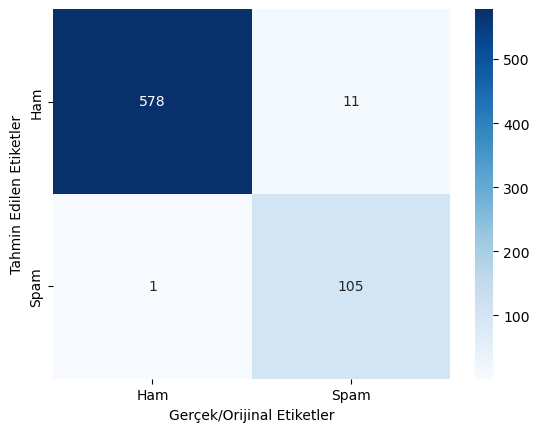

In [35]:
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Tahmin Edilen Etiketler")
plt.xlabel("Ger√ßek/Orijinal Etiketler")
plt.show()

- **TP (true positive)**: Spam olarak doƒüru tahmin edilen sayƒ± (105)
- **FP (false positive)**: Spam olduƒüu halde yanlƒ±≈ü(ham) tahmin edilen sayƒ± (11)
- **TN (true negative)**: Ham olarak doƒüru tahmin edilen sayƒ± (578)
- **FN (false negative)**: Ham olduƒüu halde yanlƒ±≈ü(spam) tahmin edilen sayƒ± (1)

### Confusion Matrix Verilerinden √áƒ±kan Fikir

KNN sƒ±nƒ±flandƒ±rmasƒ±, SVM sƒ±nƒ±flandƒ±rmasƒ±na g√∂re **sayƒ±sal olarak** spam mail tespitinde daha fazla doƒüru spam mail tespit etmesine raƒümen ham ve spam mesajlarƒ± SVM'ye g√∂re daha √ßok **yanlƒ±≈ü** kategorize ettiƒüi i√ßin spam mail tespitinde **verimlilik bakƒ±mƒ±ndan** **SVM sƒ±nƒ±flandƒ±rmasƒ± daha ba≈üarƒ±lƒ±** bir i≈ü √ßƒ±karmƒ±≈ütƒ±r.

## Sƒ±nƒ±flandƒ±rma Raporlarƒ±nƒ±n G√∂rselle≈ütirilmesi ve Deƒüerlendirilmesi

### KNN Sƒ±nƒ±flandƒ±rmasƒ± ƒ∞√ßin Rapor Sonu√ßlarƒ±

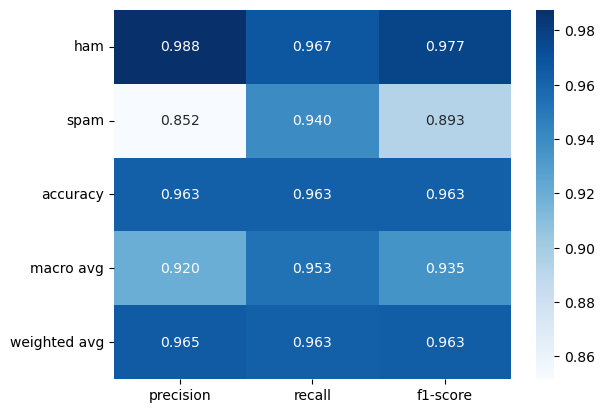

In [71]:
from sklearn.metrics import classification_report
class_names = ['ham', 'spam']

report_knn = classification_report(Y_test, y_pred_knn, target_names=class_names, output_dict=True)

sns.heatmap(pd.DataFrame(report_knn).iloc[:-1, :].T, annot=True, cmap="Blues",fmt='.3f')
plt.show()

### SVM Sƒ±nƒ±flandƒ±rmasƒ± ƒ∞√ßin Rapor Sonu√ßlarƒ±

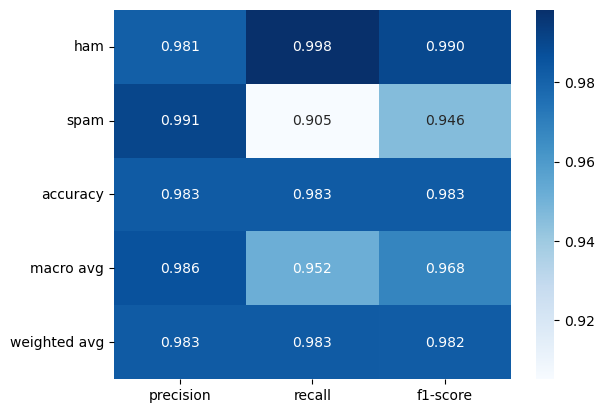

In [76]:
report_svm = classification_report(Y_test, y_pred_svm, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report_svm).iloc[:-1, :].T, annot=True, cmap="Blues",fmt='.3f')
plt.show()

## Raporlarƒ±n Deƒüerlendirilmesi

**Accuracy (Doƒüruluk) = (TP + TN) / (TP + TN + FP + FN)**: Accuracy, modelin doƒüru sƒ±nƒ±flandƒ±rƒ±lan √∂rneklerinin oranƒ±nƒ± temsil eder. Yani, doƒüru tahmin edilen √∂rneklerin toplam √∂rnek sayƒ±sƒ±na oranƒ±nƒ± g√∂sterir. Bu metrik, sƒ±nƒ±flandƒ±rma modelinin genel performansƒ±nƒ± deƒüerlendirmek i√ßin kullanƒ±lƒ±r.

**Precision (Hassasiyet) = TP / (TP + FP)**: Precision, pozitif olarak tahmin edilen √∂rnekler ile ger√ßek pozitif √∂rneklerin y√ºzdesini g√∂sterir. Yani, bir sƒ±nƒ±fƒ±n pozitif olarak tahmin edilen √∂rneklerinin ne kadarƒ±nƒ±n ger√ßekten o sƒ±nƒ±fa ait olduƒüunu g√∂sterir. Hassasiyet, yanlƒ±≈ü pozitif tahminlerin az olduƒüu durumlarda y√ºksek deƒüer alƒ±r.

**Recall (Geri √áaƒüƒ±rma) = TP / (TP + FN)**: Recall, ger√ßek pozitif √∂rnekler ile doƒüru pozitif olarak tahmin edilen √∂rneklerin y√ºzdesini g√∂sterir. Yani, bir sƒ±nƒ±fa ait ger√ßek pozitif √∂rneklerin ne kadarƒ±nƒ±n doƒüru bir ≈üekilde tahmin edildiƒüini g√∂sterir. Geri √ßaƒüƒ±rma, yanlƒ±≈ü negatif tahminlerin az olduƒüu durumlarda y√ºksek deƒüer alƒ±r.

### Doƒüruluk (Accuracy):

- KNN: 0.9626
- SVM: 0.9827

SVM modeli, doƒüruluk a√ßƒ±sƒ±ndan KNN modeline g√∂re daha y√ºksek bir performans sergilemektedir. Bu, SVM modelinin genel olarak daha doƒüru tahminler yaptƒ±ƒüƒ±nƒ± g√∂sterir.

### Hassasiyet (Precision):

- KNN - Spam: 0.8516
- SVM - Spam: 0.9906

SVM modeli, spam sƒ±nƒ±fƒ± i√ßin daha y√ºksek hassasiyet deƒüerine sahiptir. Bu, SVM'in spam olarak tahmin ettiƒüi √∂rneklerin ger√ßekten spam olma olasƒ±lƒ±ƒüƒ±nƒ±n daha y√ºksek olduƒüunu g√∂sterir. SVM, yanlƒ±≈ü pozitiflerin sayƒ±sƒ±nƒ± azaltmada daha ba≈üarƒ±lƒ±dƒ±r.

### Geri √áaƒüƒ±rma (Recall):

- KNN - Spam: 0.9397
- SVM - Spam: 0.9052

KNN modeli, spam sƒ±nƒ±fƒ±nƒ± geri √ßaƒüƒ±rma a√ßƒ±sƒ±ndan daha y√ºksek bir performans sergilemektedir. Bu, KNN'in ger√ßek spam √∂rneklerinin daha b√ºy√ºk bir kƒ±smƒ±nƒ± doƒüru bir ≈üekilde tespit ettiƒüini g√∂sterir.

### F1-Skoru:

- KNN - Spam: 0.8934
- SVM - Spam: 0.9459

SVM modeli, spam sƒ±nƒ±fƒ± i√ßin daha y√ºksek bir F1-skoruna sahiptir. Bu, SVM'in hem hassasiyeti hem de geri √ßaƒüƒ±rma deƒüerlerini dengeleyerek daha iyi bir performans sergilediƒüini g√∂sterir.

### Sonu√ß
Genel olarak, SVM modeli KNN modeline g√∂re daha y√ºksek hassasiyet ve F1-skoru deƒüerlerine sahiptir. Bununla birlikte, KNN modeli spam sƒ±nƒ±fƒ± i√ßin daha y√ºksek geri √ßaƒüƒ±rma deƒüerine sahiptir. Bu, SVM modelinin spam e-postalarƒ±nƒ± daha iyi tespit edebilme yeteneƒüine sahip olduƒüunu g√∂sterirken, KNN modelinin spam √∂rneklerini ka√ßƒ±rma olasƒ±lƒ±ƒüƒ±nƒ±n daha d√º≈ü√ºk olduƒüunu g√∂sterir.

Bu bilgilere dayanarak, SVM modelinin genel olarak spam tespitinde daha g√º√ßl√º olduƒüunu s√∂yleyebiliriz. Ancak, her iki modelin de farklƒ± avantajlarƒ± ve g√º√ßl√º yanlarƒ± bulunmaktadƒ±r.

### Spam / Ham Kesi≈üim Deƒüerlerinin Anlamlarƒ±

**Precision-Spam Kesi≈üimi**: Bu deƒüer, "spam" sƒ±nƒ±fƒ±nƒ±n doƒüru pozitif tahminlerinin, toplam "spam" tahminlerine oranƒ±nƒ± temsil eder. Yani, spam olarak tahmin edilen √∂rneklerin ne kadarƒ±nƒ±n ger√ßekten spam olduƒüunu g√∂sterir.

**Precision-Ham Kesi≈üimi**: Bu deƒüer, "ham" sƒ±nƒ±fƒ±nƒ±n doƒüru pozitif tahminlerinin, toplam "ham" tahminlerine oranƒ±nƒ± temsil eder. Yani, ham olarak tahmin edilen √∂rneklerin ne kadarƒ±nƒ±n ger√ßekten ham olduƒüunu g√∂sterir.

**Recall-Spam Kesi≈üimi**: Bu deƒüer, "spam" sƒ±nƒ±fƒ±nƒ±n doƒüru pozitif tahminlerinin, toplam ger√ßek "spam" √∂rneklerine oranƒ±nƒ± temsil eder. Yani, ger√ßek spam √∂rneklerinin ne kadarƒ±nƒ±n doƒüru bir ≈üekilde tahmin edildiƒüini g√∂sterir.

**Recall-Ham Kesi≈üimi**: Bu deƒüer, "ham" sƒ±nƒ±fƒ±nƒ±n doƒüru pozitif tahminlerinin, toplam ger√ßek "ham" √∂rneklerine oranƒ±nƒ± temsil eder. Yani, ger√ßek ham √∂rneklerinin ne kadarƒ±nƒ±n doƒüru bir ≈üekilde tahmin edildiƒüini g√∂sterir.

**F1-Score-Spam Kesi≈üimi**: Bu deƒüer, "spam" sƒ±nƒ±fƒ±nƒ±n hassasiyet (precision) ve geri √ßaƒüƒ±rma (recall) deƒüerlerinin harmonik ortalamasƒ±nƒ± temsil eder. Bu, spam sƒ±nƒ±fƒ±nƒ±n doƒüru pozitif tahminlerinin yanƒ± sƒ±ra yanlƒ±≈ü pozitif ve yanlƒ±≈ü negatif tahminlerin de dikkate alƒ±ndƒ±ƒüƒ± bir denge metriƒüidir.

**F1-Score-Ham Kesi≈üimi**: Bu deƒüer, "ham" sƒ±nƒ±fƒ±nƒ±n hassasiyet (precision) ve geri √ßaƒüƒ±rma (recall) deƒüerlerinin harmonik ortalamasƒ±nƒ± temsil eder. Bu, ham sƒ±nƒ±fƒ±nƒ±n doƒüru pozitif tahminlerinin yanƒ± sƒ±ra yanlƒ±≈ü pozitif ve yanlƒ±≈ü negatif tahminlerin de dikkate alƒ±ndƒ±ƒüƒ± bir denge metriƒüidir.

### Oran/Y√ºzde/Ortalama Kesi≈üim Deƒüerlenin Anlamlarƒ±

**Accuracy - Precision**: Bu deƒüer, doƒüru pozitif tahminlerin toplam pozitif tahminlere oranƒ±nƒ± temsil eder. Y√ºksek bir hassasiyet deƒüeri, yanlƒ±≈ü pozitif tahminlerin az olduƒüunu g√∂sterir. Accuracy, doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rƒ±lan √∂rneklerin toplam √∂rnek sayƒ±sƒ±na oranƒ±nƒ± g√∂sterir.

**Accuracy - Recall**: Bu deƒüer, doƒüru pozitif tahminlerin ger√ßek pozitif √∂rneklerin y√ºzdesini temsil eder. Y√ºksek bir geri √ßaƒüƒ±rma deƒüeri, yanlƒ±≈ü negatif tahminlerin az olduƒüunu g√∂sterir. Accuracy, doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rƒ±lan √∂rneklerin toplam √∂rnek sayƒ±sƒ±na oranƒ±nƒ± g√∂sterir.

**Accuracy - F1-Score** Kesi≈üimi: Bu deƒüer, hassasiyet (precision) ve geri √ßaƒüƒ±rma (recall) deƒüerlerinin harmonik ortalamasƒ±nƒ± temsil eder. Bu metrik, hem hassasiyeti hem de geri √ßaƒüƒ±rma deƒüerini dikkate alarak bir denge saƒülar. Accuracy, doƒüru bir ≈üekilde sƒ±nƒ±flandƒ±rƒ±lan √∂rneklerin toplam √∂rnek sayƒ±sƒ±na oranƒ±nƒ± g√∂sterir.

**Weighted Avg - Precision**: Aƒüƒ±rlƒ±klƒ± ortalama olarak hesaplanan hassasiyet (precision) deƒüeri. Bu, t√ºm sƒ±nƒ±flarƒ±n tahminlerine g√∂re hesaplanan ve sƒ±nƒ±flar arasƒ±ndaki √∂rnek sayƒ±larƒ±na dayalƒ± olarak aƒüƒ±rlƒ±klandƒ±rƒ±lan bir ortalama deƒüerdir.

**Weighted Avg - Recall**: Aƒüƒ±rlƒ±klƒ± ortalama olarak hesaplanan geri √ßaƒüƒ±rma (recall) deƒüeri. Bu, t√ºm sƒ±nƒ±flarƒ±n tahminlerine g√∂re hesaplanan ve sƒ±nƒ±flar arasƒ±ndaki √∂rnek sayƒ±larƒ±na dayalƒ± olarak aƒüƒ±rlƒ±klandƒ±rƒ±lan bir ortalama deƒüerdir.

**Weighted Avg - F1-Score**: Aƒüƒ±rlƒ±klƒ± ortalama olarak hesaplanan F1 skoru. Bu, t√ºm sƒ±nƒ±flarƒ±n tahminlerine g√∂re hesaplanan ve sƒ±nƒ±flar arasƒ±ndaki √∂rnek sayƒ±larƒ±na dayalƒ± olarak aƒüƒ±rlƒ±klandƒ±rƒ±lan bir ortalama deƒüerdir.

**Macro Avg - Precision**: Makro ortalama olarak hesaplanan hassasiyet (precision) deƒüeri. Bu, t√ºm sƒ±nƒ±flarƒ±n hassasiyet deƒüerlerinin aritmetik ortalamasƒ±nƒ± temsil eder. Her sƒ±nƒ±fƒ±n performansƒ± aynƒ± aƒüƒ±rlƒ±ƒüa sahiptir.

**Macro Avg - Recall**: Makro ortalama olarak hesaplanan geri √ßaƒüƒ±rma (recall) deƒüeri. Bu, t√ºm sƒ±nƒ±flarƒ±n geri √ßaƒüƒ±rma deƒüerlerinin aritmetik ortalamasƒ±nƒ± temsil eder. Her sƒ±nƒ±fƒ±n performansƒ± aynƒ± aƒüƒ±rlƒ±ƒüa sahiptir.

**Macro Avg - F1-Score**: Makro ortalama olarak hesaplanan F1 skoru. Bu, t√ºm sƒ±nƒ±flarƒ±n F1 skorlarƒ±nƒ±n aritmetik ortalamasƒ±nƒ± temsil eder. Her sƒ±nƒ±fƒ±n performansƒ± aynƒ± aƒüƒ±rlƒ±ƒüa sahiptir.

# Optimizasyon ƒ∞√ßin Yapƒ±labilecek Se√ßenekler

1 - **Model Parametrelerini Ayarlama(Hiperparametre)**: Sƒ±nƒ±flandƒ±rma algoritmalarƒ±nƒ±n belirli parametreleri vardƒ±r, √∂rneƒüin KNN i√ßin kom≈üu sayƒ±sƒ± (n_neighbors) veya uzaklƒ±k √∂l√ß√ºt√º (metric). Bu parametreleri deƒüi≈ütirerek farklƒ± deƒüerleri deneyebilir ve modelin performansƒ±nƒ± kontrol edebiliriz.

2 - **Yeni Veri √ñni≈üleme adƒ±mlarƒ±** ekleyebilir veya adƒ±mlarƒ± **iyile≈ütirebiliriz**.

3 - **Yeni √ñzellik Se√ßim**i veya **√ñznitelik M√ºhendisliƒüi** kullanarak eyni √∂zellik orataya √ßƒ±karabilriiz.

4 - **Model Ensamblesi**: Birden fazla modeli birle≈ütirerek bir ensemble modeli olu≈üturabilirsiniz. Bu, modelin daha iyi genelleme yapmasƒ±na ve daha iyi performans elde etmesine yardƒ±mcƒ± olabilir. √ñrneƒüin, SVM ile birlikte ba≈üka bir algoritma kullanarak ensemble modeli olu≈üturabiliriz.

5 - **Cross-Validation**: Modelin performansƒ±nƒ± daha g√ºvenilir bir ≈üekilde deƒüerlendirmek i√ßin √ßapraz doƒürulama (cross-validation) y√∂ntemlerini kullanabiliriz. Bu, veri setini farklƒ± par√ßalara b√∂ler ve modeli her bir par√ßa √ºzerinde eƒüitip test ederek genel performansƒ± deƒüerlendirmenizi saƒülar.


### **Hiperparametre optimizasyonu** i√ßin bazƒ± y√∂ntemler;

**Grid Search**: Grid search, belirli bir parametre kombinasyonu k√ºmesini deneyerek en iyi performansƒ± elde etmeyi ama√ßlar. Grid search, t√ºm parametre kombinasyonlarƒ±nƒ± sƒ±rayla deneyerek en iyi sonucu veren hiperparametreleri belirler.

**Random Search**: Random search, belirli bir parametre daƒüƒ±lƒ±mƒ± i√ßinden rastgele se√ßilen parametre deƒüerlerini deneyerek en iyi sonucu elde etmeyi ama√ßlar. Bu y√∂ntemde, parametre kombinasyonlarƒ±nƒ± rastgele se√ßmek ve test etmek i√ßin belirli bir sayƒ±da deneme yapƒ±lƒ±r.

**Bayes Optimize**: Bayes optimize, √∂nceki deneyimlere dayalƒ± olarak parametrelerin hangi deƒüerlerinin daha iyi sonu√ß vereceƒüini tahmin eden bir model kullanƒ±r. Bu tahminlerle birlikte yeni parametre kombinasyonlarƒ± se√ßilerek en iyi sonuca ula≈üƒ±lƒ±r.

Bu teknikleri, **Grid Search ve Random Search, scikit-learn** gibi makine √∂ƒürenimi k√ºt√ºphanelerini kullanarak kolayca uygulayabiliriz.

## SVM Sƒ±nƒ±flandƒ±rmasƒ±nda Bulunan √ñnemli Parametreler ve Varsayƒ±lan Deƒüerleri

**C**: Bu parametre, SVM'nin hata toleransƒ±nƒ± kontrol eder. C deƒüeri ne kadar b√ºy√ºkse, modelin daha az hata toleransƒ± g√∂sterdiƒüi anlamƒ±na gelir. Yani, b√ºy√ºk bir C deƒüeri sƒ±nƒ±flandƒ±rma hatasƒ±na daha az izin verirken, k√º√ß√ºk bir C deƒüeri daha fazla hata tolere eder. Bu parametre, modelin a≈üƒ±rƒ± uyma (overfitting) veya a≈üƒ±rƒ± genelleme (underfitting) yapma yeteneƒüini etkiler. **C deƒüeri √ºzerindeki ayarlamalar, modelin sƒ±nƒ±flandƒ±rma hatasƒ±nƒ± azaltmak veya veriye daha fazla uyum saƒülamak i√ßin yapƒ±lƒ±r**.Varsayƒ±lan deƒüeri 1.0'dƒ±r.

**kernel**:  SVM'nin √ßekirdek fonksiyonunu belirler. **√áekirdek fonksiyonu, verileri y√ºksek boyutlu uzayda d√∂n√º≈üt√ºrerek doƒürusal olarak ayrƒ±labilir hale getiri**r. Varsayƒ±lan olarak "rbf" (Radial Basis Function) √ßekirdeƒüi kullanƒ±lƒ±r, √ß√ºnk√º non-lineer karar sƒ±nƒ±rlarƒ±nƒ± modellerken etkilidir. Farklƒ± √ßekirdekler arasƒ±nda "linear", "poly" (polinom), "sigmoid" gibi se√ßenekler bulunur. Hangi √ßekirdek fonksiyonunun kullanƒ±lacaƒüƒ±, veri setinin doƒüasƒ± ve sƒ±nƒ±flandƒ±rma probleminin gereksinimlerine baƒülƒ±dƒ±r.

**gamma**: Gamma parametresi, rbf, poly ve sigmoid √ßekirdeklerinde kullanƒ±lƒ±r. Varsayƒ±lan olarak "scale" deƒüeri kullanƒ±lƒ±r, bu da gamma deƒüerini 1 / (n_features * X.var()) form√ºl√ºyle hesaplar. **Gamma, √ßekirdek fonksiyonunun esnekliƒüini kontrol eder. K√º√ß√ºk bir gamma deƒüeri, geni≈ü bir etki alanƒ± saƒülar ve daha d√ºzg√ºn bir sƒ±nƒ±flandƒ±rma yapar. B√ºy√ºk bir gamma deƒüeri, verilere daha yakƒ±n noktalara odaklanƒ±r ve karma≈üƒ±k, kƒ±vrƒ±mlƒ± sƒ±nƒ±flandƒ±rma b√∂lgeleri olu≈üturur.** Gamma deƒüeri √ºzerinde yapƒ±lan ayarlamalar, modelin a≈üƒ±rƒ± uyma veya a≈üƒ±rƒ± genelleme eƒüilimini etkiler. Varsayƒ±lan deƒüeri "scale" olarak belirlenmi≈ütir. 

**degree**: **Degree parametresi, polinom √ßekirdeƒüi kullanƒ±ldƒ±ƒüƒ±nda polinomun derecesini belirler.** Varsayƒ±lan deƒüeri 3't√ºr, yani √º√ß√ºnc√º dereceden bir polinom kullanƒ±lƒ±r. Polinom √ßekirdeƒüi, non-lineer sƒ±nƒ±flandƒ±rma problemlerini ele almak i√ßin kullanƒ±lƒ±r. Derece deƒüeri arttƒ±k√ßa, polinomun karma≈üƒ±klƒ±ƒüƒ± ve esnekliƒüi artar. Ancak √ßok y√ºksek dereceli polinomlar kullanmak, a≈üƒ±rƒ± uyma sorununa yol a√ßabilir. Derece deƒüeri, sƒ±nƒ±flandƒ±rma probleminin karma≈üƒ±klƒ±ƒüƒ±na ve veri setinin doƒüasƒ±na baƒülƒ± olarak se√ßilir.

### RandomizedSearch ile En Optimum SVM Parametrelerini Bularak Modeli Optimize Etme

In [56]:
from sklearn.model_selection import RandomizedSearchCV
X_train_tfidf = tvec.fit_transform(X_train)
X_test_tfidf = tvec.transform(X_test)


# Hiperparametrelerin deƒüer aralƒ±ƒüƒ±nƒ± belirleme
param_dist = {
    'C': [0.1, 1.0, 1.5, 10.0],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# RandomizedSearchCV ile SVM √∂zelinde hiperparametre optimizasyonu yapma
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train_tfidf, Y_train)

# En iyi parametreleri ekrana bastƒ±ralƒ±m
best_params = random_search.best_params_
print("En iyi parametreler: ", best_params)


# En iyi parametreleri bulunan SVM modelini kullanarak tahmin yapma
y_pred_best = random_search.predict(X_test_tfidf)

# Model performansƒ±nƒ± deƒüerlendirme
cm_best = confusion_matrix(y_pred_best, Y_test)
accuracy_best = accuracy_score(y_pred_best, Y_test)

print("Confusion Matrix:")
print(cm_best)
print("Accuracy: ", accuracy_best)

En iyi parametreler:  {'kernel': 'linear', 'gamma': 0.01, 'C': 1.0}
Confusion Matrix:
[[578   5]
 [  1 111]]
Accuracy:  0.9913669064748202


## Optimum Deƒüerleri Bulunan SVC Parametreleri ƒ∞le Modeli Eƒüitme

In [57]:
svm = SVC(kernel='linear', gamma=0.01, C=1.5) # Optimum Deƒüerler 
# C deƒüerini 1.5 yaptƒ±m √ß√ºnk√º sadece C i√ßin optimum deƒüer arandƒ±ƒüƒ±nda 1.5 ve 10 deƒüerleri daha iyi sonu√ß veriyor.
model_best_svm = Pipeline([('vectorizer', tvec), ('classifier', svm)])
# Modeli eƒüitme
model_best_svm.fit(X_train, Y_train)

# Test verileri √ºzerinde tahmin yapma
y_pred_best_svm = model_best_svm.predict(X_test)

# Confusion matrix olu≈üturma ve g√∂rselle≈ütirme
cm_best_svm = confusion_matrix(y_pred_best_svm,Y_test)
print(cm_best_svm)
print("Accuracy : ", accuracy_score(y_pred_best_svm,Y_test))

[[578   4]
 [  1 112]]
Accuracy :  0.9928057553956835


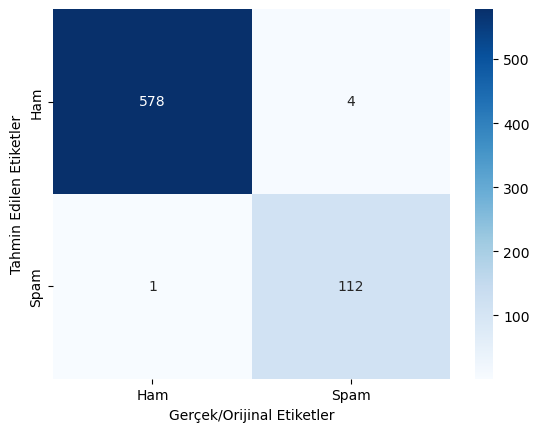

In [40]:
class_names = ['Ham', 'Spam']
sns.heatmap(cm_best_svm, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)

plt.ylabel("Tahmin Edilen Etiketler")
plt.xlabel("Ger√ßek/Orijinal Etiketler")
plt.show()
#[[578  11] Optimize Edilmemi≈ü Confusion matrix deƒüerleri
#[  1 105]]


- **TP (true positive)**: Spam olarak doƒüru tahmin edilen sayƒ± (112)
- **FP (false positive)**: Spam olduƒüu halde yanlƒ±≈ü(ham) tahmin edilen sayƒ± (4)
- **TN (true negative)**: Ham olarak doƒüru tahmin edilen sayƒ± (578)
- **FN (false negative)**: Ham olduƒüu halde yanlƒ±≈ü(spam) tahmin edilen sayƒ± (1)

## Optimize Edilmi≈ü ve Edilmemi≈ü SVM Modellerinin Kƒ±yaslanmasƒ±

### Optimize Edilmi≈ü SVM Modelinin Raporu

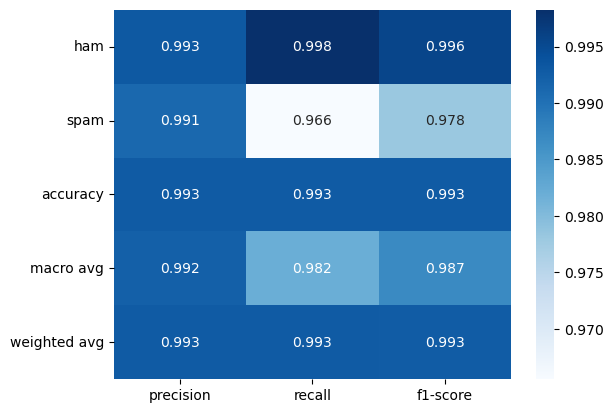

In [74]:
class_names = ['ham', 'spam']
report_best_svm = classification_report(Y_test, y_pred_best_svm, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report_best_svm).iloc[:-1, :].T, annot=True, cmap="Blues",fmt='.3f')
plt.show()

### Optimize Edilmemi≈ü SVM Modelinin Raporu

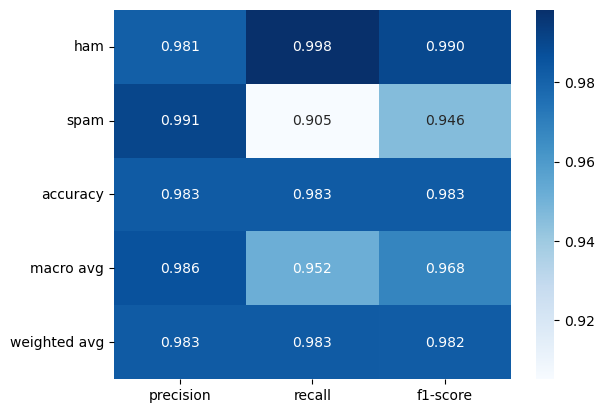

In [42]:
report_svm = classification_report(Y_test, y_pred_svm, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report_svm).iloc[:-1, :].T, annot=True, cmap="Blues",fmt='.3f')
plt.show()

## Raporlarƒ±n Deƒüerlendirilmesi

**Hassasiyet (Precision)**: Optimizasyon sonucunda SVM modelinin ham sƒ±nƒ±f i√ßin hassasiyeti varsayƒ±lan modele g√∂re artmƒ±≈ütƒ±r. Bu, optimize edilmi≈ü modelin ham sƒ±nƒ±fƒ± daha iyi tanƒ±dƒ±ƒüƒ±nƒ± ve ham etiketli √∂rnekleri yanlƒ±≈ü pozitif olarak sƒ±nƒ±flandƒ±rma olasƒ±lƒ±ƒüƒ±nƒ±n daha d√º≈ü√ºk olduƒüunu g√∂sterir. Spam sƒ±nƒ±f i√ßin ise hassasiyet deƒüeri hemen hemen aynƒ± kalmƒ±≈ütƒ±r.

**Duyarlƒ±lƒ±k (Recall)**: Optimizasyon sonucunda SVM modelinin spam sƒ±nƒ±fƒ± i√ßin duyarlƒ±lƒ±ƒüƒ± artmƒ±≈ütƒ±r. Bu, optimize edilmi≈ü modelin spam e-postalarƒ±nƒ± daha etkili bir ≈üekilde tespit ettiƒüi ve daha az yanlƒ±≈ü negatif (ger√ßek spam olanlarƒ± yanlƒ±≈ülƒ±kla spam olmayan olarak sƒ±nƒ±flandƒ±rma) yaptƒ±ƒüƒ±nƒ± g√∂sterir. Ham sƒ±nƒ±f i√ßin duyarlƒ±lƒ±k deƒüeri ise hemen hemen aynƒ± kalmƒ±≈ütƒ±r.

**F1-Skoru**: Optimize edilmi≈ü SVM modelinin ham sƒ±nƒ±f i√ßin F1-skoru varsayƒ±lan modele g√∂re artmƒ±≈ütƒ±r. Bu, optimize edilmi≈ü modelin hem hassasiyeti hem de duyarlƒ±lƒ±ƒüƒ± daha iyi dengelediƒüini ve ham sƒ±nƒ±fƒ± daha iyi bir ≈üekilde sƒ±nƒ±flandƒ±rdƒ±ƒüƒ±nƒ± g√∂sterir. Spam sƒ±nƒ±fƒ± i√ßin F1-skoru ise hemen hemen aynƒ± kalmƒ±≈ütƒ±r.

**Doƒüruluk (Accuracy)**: Optimize edilmi≈ü SVM modelinin doƒüruluk deƒüeri varsayƒ±lan modele g√∂re artmƒ±≈ütƒ±r. Bu, optimize edilmi≈ü modelin toplamda daha iyi bir performans sergilediƒüini ve doƒüru sƒ±nƒ±flandƒ±rma oranƒ±nƒ±n y√ºkseldiƒüini g√∂sterir.

**Sonu√ß olarak**, optimize edilmi≈ü SVM modeli, ham sƒ±nƒ±f i√ßin hassasiyet, spam sƒ±nƒ±fƒ± i√ßin duyarlƒ±lƒ±k ve genel doƒüruluk a√ßƒ±larƒ±ndan varsayƒ±lan modele g√∂re daha iyi bir performans sergilemektedir. Bu optimizasyon, ham sƒ±nƒ±fƒ±n daha iyi tanƒ±nmasƒ± ve spam e-postalarƒ±nƒ±n daha etkili bir ≈üekilde tespit edilmesi gibi alanlarda modelin performansƒ±nƒ± artƒ±rmƒ±≈ütƒ±r.

# Son A≈üama : Modelin Dƒ±≈ü Kaynaklar √úzerinde Test Edilmesi

In [43]:
test1=model_best_svm.predict(["New Product Announcement: Introducing the XYZ Smartphone Discover the latest innovation in mobile technology with our new XYZ Smartphone. Pre-order now to be among the first to own it"])
print(test1[0])

0


In [44]:
#test2 = model_best_svm.predict([""])
test2 = model_best_svm.predict(["Free Trial: Try Our Exclusive Product Now! Experience the benefits of our revolutionary product with a free trial. Limited quantities available."])
print(test2[0])


1


In [45]:
test3 = model_best_svm.predict(["URGENT: Immediate Action Required!Your account has been compromised. Please click on the link to verify your information and secure your account."])
print(test3[0])

1


In [46]:
test4 = model_best_svm.predict(["Your microsoft account has been compromised ,you must update before or else your account going to close click to update"])
print(test4[0])

0


In [47]:
test5 = model_best_svm.predict(["How to write on-brand, factual articles with AI Article Writer 5.0? Hey Talha, Last week, we launched AI Article Writer 5.0: a personalized, factual, SEO article writer. And it ended being the #2 product of the day on Product Hunt. Thank you for your support! üéâAs our usual drill, it's time for a LIVE training session.So here's your invite to an exclusive session on ‚Äì Using AI Article Writer 5.0 to craft on-brand, factual articles.In under an hour, I'll show you how to set up your brand voice, use document-based generation, and create SEO-optimized blog posts and articles that are super personalized & factually accurate. üöÄClick here to registerüìÖ Mark your calendars...Date: June 15, 2023 Time: 12 pm EDT/EST (9.30 pm IST)Place: Zoom (link will be shared post-registration)Reserve your spot now!Moreover, we'll also have a QnA session where I'll answer all your questions in real time. That's not it. I'll also spill some beans on our upcoming launches.But here's the catch ‚Äì spots are limited and filling up fast.Click here to claim your seat NOW! See you there. üëãCheers,SamCEO & Founder @ WritesonicPS. Have a look at what people are saying about AI Article Writer 5.0 on Product Hunt.üëá"])
print(test5[0])

0


In [48]:
test6 = model_best_svm.predict(["[Free Webinar] 8 Ways AI can Boost Your Business with No-code Hello Valued Appy Pie User,I hope this email finds you well. I wanted to extend a special invitation to you for an upcoming webinar that explores the exciting and powerful ways small businesses are utilizing AI to fuel their growth and success.Text to Image GeneratorText to Image Generator:It enables small businesses to instantly convert text prompts into visually striking images and create eye-catching graphics.Text to Animation MakerText to Animation Generator:It takes text inputs, understands the context and creates engaging animations that businesses can use as marketing collateral or publish on social channels. Animation maker is currently in alpha testing.Text to Logo GeneratorText to Logo Generator:It empowers small businesses to create stunning, professional logos in minutes, using the power of AI and customizable design templates.Text to avatar generatorText to Avatar Generator:Make trending and realistic avatars by just writing the text and specifying the age, gender, facial features, hairstyle, and accessories of your avatar.AI photo enhancerAI Photo Enhancer:Use it to improve the quality and appearance of your photos. You can also apply filters, effects, and stickers and even adjust brightness, contrast, saturation, sharpness, noise reduction, and whatnot!Text to App GeneratorText to App Generator:It transforms text-based ideas into fully functional, customized mobile applications without any coding knowledge.Text to Website BuilderText to Website Builder:Converts text-based content into stunning, responsive websites with hundreds of features.Text to ChatBot GeneratorText to ChatBot Generator:It transforms text into interactive chatbots with ease, empowers small businesses by revolutionizing customer interaction and boosting efficiency.Title: 8 Ways Small Businesses are using AI to Fuel GrowthDate: 28 June, 2023Time: 12 PM ESTDuring this insightful webinar, we will delve into these 8 powerful strategies and techniques employed by small businesses to leverage AI and drive significant growth. We will showcase real-world examples and provide expert insights on how Appy Pie‚Äôs suite of AI-powered products can empower your business to achieve remarkable results.Reserve Your SpotPlease Note: For a limited time only, we have an exclusive offer for our valued Appy Pie users. Take advantage of a 30% discount on all plans of Appy Pie‚Äôs AI-powered app builder. Simply apply the coupon code TIPS30.Save 30%, Create Your AppBest regards,Joel PerezVP of Customer SuccessAppy Pie"])
print(test6[0])

0


In [49]:
test7 = model_best_svm.predict(["Hello! This update shares progress in our live games and the new Unity version of Eternium in development. Our next email will discuss the upcoming Closed Alpha test for , the highly anticipated new action-RPG from Dream Primer.Live operations of Eternium have been fully transitioned to Making Fun, while Dream Primer focuses on Project Artemis. We fixed a number of bugs identified by the player community, reactivated side quests, and made updates required by Google and Apple. We are now running all 3 ANB (‚ÄúA New Beginning‚Äù) events within each Season. We are exploring creating a new season-long leaderboard to support this new format.The rebuild of Eternium in Unity is at an exciting point. We hit ‚Äúfirst playable‚Äù at the start of May, an official milestone to mark the transition from ‚Äúexperimentation mode‚Äù to ‚Äúproduction‚Äù. It felt amazing to see Eternium taking up the FULL screen of my Android phone and to play the familiar first level with the familiar music while seeing opportunities to grow and evolve the game‚Äôs appeal for the next decade. Here is a video update that includes a play-through of level 1.Upcoming goals include improving foundational artistic and technical systems such as enemies, abilities, and the user interface and perfecting the tap/gesture input scheme for mobile. Artists are working to enhance the graphics workflow on level 3, which has more sophisticated requirements due to the introduction of variable height terrain. Keep an eye on the Eternium Forum for more updates.Runestrike had a major update in March. We introduced a streamlined Home screen, a new Collection screen to make it easier to find and equip Skins, and a new Conquests feature with semi-weekly challenges that will spice up how you play Runestrike. Extra mana‚Ä¶ more blood‚Ä¶ minions that come into play with Blitz... These challenges bring a new level of fun and strategy to the deck building battler.Hidden Express is smoking steadily along with 3,775 levels! In March, we released a new mid-week event, City Spotlight. Each week we feature a mystery City that is hidden by 20 tiles. Some of the tiles have power-ups under them, some have random levels, and the rest have the levels from the mystery City. Clear all 20 tiles before the timer runs out to completely reveal the hidden City map and earn great rewards!We listen carefully to our player communities and strongly consider you in all decisions. Come say hello! The latest discussions can always be found on Discord: Eternium, Runestrike.John WelchCEO | Making Fun"])
print(test7[0])

1


-----------------------------------spam mailler--------------------------------------------------

Subject: "Get Rich Quick!"
Body: "Make thousands of dollars a day with our amazing money-making system. Don't miss this opportunity!"

Subject: "Exclusive Offer: Limited Time Only!"
Body: "Get 50% off on all our products! Don't wait, this offer is only available for a limited time."

Subject: "You've Won a Luxury Vacation!"
Body: "Congratulations! You've won an all-expenses-paid luxury vacation to a tropical paradise. Claim your prize now!"

Subject: "Increase Your Website Traffic Overnight!"
Body: "Boost your website's traffic and reach new customers instantly with our revolutionary marketing tool."

Subject: "Lose Weight Fast and Easy!"
Body: "Discover the secret to rapid weight loss. Our scientifically proven method will help you shed those extra pounds in no time."

Subject: "Investment Opportunity of a Lifetime!"
Body: "Don't miss out on this once-in-a-lifetime investment opportunity. Earn massive returns with minimal risk."

Subject: "Free Trial: Try Our Exclusive Product Now!"
Body: "Experience the benefits of our revolutionary product with a free trial. Limited quantities available."

Subject: "Claim Your Inheritance!"
Body: "You are entitled to a substantial inheritance from a distant relative. Contact us to claim your rightful fortune."

Subject: "Special Discount for Our Valued Customers!"
Body: "As a valued customer, you are eligible for a special discount on our latest collection. Shop now and save big!"

Subject: "URGENT: Immediate Action Required!"
Body: "Your account has been compromised. Please click on the link to verify your information and secure your account."

-----------------------------------ham mailler--------------------------------------------------

Subject: "Invitation to a Charity Event"
Body: "You are cordially invited to our annual charity gala. Join us for an evening of giving back and making a difference in our community."

Subject: "Job Interview Confirmation"
Body: "Thank you for scheduling an interview with our company. We look forward to meeting you on the specified date and time."

Subject: "Payment Confirmation for Order #12345"
Body: "Your payment for the recent order has been successfully processed. We will notify you once your items are shipped."

Subject: "Weekly Newsletter: Stay Updated with Our Latest News"
Body: "Subscribe to our weekly newsletter to receive updates on industry trends, upcoming events, and exclusive offers."

Subject: "Congratulations on Your Graduation!"
Body: "Congratulations on completing your studies! We wish you all the best in your future endeavors."

Subject: "Reminder: Upcoming Webinar on Digital Marketing Strategies"
Body: "Don't forget to join our webinar on the best practices for effective digital marketing. Register now to secure your spot."

Subject: "Vacation Rental Confirmation"
Body: "Your reservation for the vacation rental has been confirmed. We hope you have a wonderful stay!"

Subject: "Important Update: Changes to Terms and Conditions"
Body: "We have made updates to our terms and conditions. Please review the changes and let us know if you have any questions."

Subject: "New Product Announcement: Introducing the XYZ Smartphone"
Body: "Discover the latest innovation in mobile technology with our new XYZ Smartphone. Pre-order now to be among the first to own it."

Subject: "Thank You for Your Recent Purchase"
Body: "Thank you for shopping with us. We appreciate your business and hope you enjoy your new products."

### Test Veri Seti √úzerinde Modelimizi Tekrar Test Edecek Olursak:

In [77]:
y_pred_test = model_best_svm.predict(X_test)
cm_test = confusion_matrix(y_pred_test,Y_test)
print("Confusion Matrix:\n", cm_test)
print("Accuracy:", accuracy_score(Y_test, y_pred_test))

Confusion Matrix:
 [[578   4]
 [  1 112]]
Accuracy: 0.9928057553956835


## **Sonu√ß olarak, dƒ±≈ü kaynaklardan getirilen verilerin de ba≈üarƒ±lƒ± bir ≈üekilde sƒ±nƒ±flandƒ±rƒ±ldƒ±ƒüƒ± raporlanmƒ±≈ütƒ±r.**